In [1]:
import pandas as pd
import numpy as np

In [4]:
true = pd.read_csv("../data/features_true_400.csv", index_col="Unnamed: 0")
true = true[['label', 'sentence_count',
       'avg_sentence_length', 'open_closed_ratio', 'simple_verbs_ratio',
       'pause_count', 'avg_word_length',
       'pronoun_proportion', 'non_dict_word_proportion', 'adverb_proportion']]

true_0 = true[true['label'] == 0].drop(columns = "label")
true_1 = true[true['label'] == 1].drop(columns = "label")
print(true_0.shape, true_1.shape)
true_diff = true_1.mean(axis = 0) - true_0.mean(axis = 0)

(200, 9) (200, 9)


In [5]:
v1 = pd.read_csv("../data/features_v1_4000.csv", index_col="Unnamed: 0")
v1 = v1[['label', 'sentence_count',
       'avg_sentence_length', 'open_closed_ratio', 'simple_verbs_ratio',
       'pause_count', 'avg_word_length',
       'pronoun_proportion', 'non_dict_word_proportion', 'adverb_proportion']]

v1_0 = v1[v1['label'] == 0].drop(columns = "label")
v1_1 = v1[v1['label'] == 1].drop(columns = "label")
print(v1_0.shape, v1_1.shape)
v1_diff = v1_1.mean(axis = 0) - v1_0.mean(axis = 0)

(2000, 9) (2000, 9)


In [6]:
v3 = pd.read_csv("../data/features_v3_4000.csv", index_col="Unnamed: 0")
v3 = v3[['label', 'sentence_count',
       'avg_sentence_length', 'open_closed_ratio', 'simple_verbs_ratio',
       'pause_count', 'avg_word_length',
       'pronoun_proportion', 'non_dict_word_proportion', 'adverb_proportion']]

v3_0 = v3[v3['label'] == 0].drop(columns = "label")
v3_1 = v3[v3['label'] == 1].drop(columns = "label")
print(v3_0.shape, v3_1.shape)
v3_diff = v3_1.mean(axis = 0) - v3_0.mean(axis = 0)

(2000, 9) (2000, 9)


In [7]:
v4 = pd.read_csv("../data/features_v4_4000.csv", index_col="Unnamed: 0")
v4 = v4[['label', 'sentence_count',
       'avg_sentence_length', 'open_closed_ratio', 'simple_verbs_ratio',
       'pause_count', 'avg_word_length',
       'pronoun_proportion', 'non_dict_word_proportion', 'adverb_proportion']]

v4_0 = v4[v4['label'] == 0].drop(columns = "label")
v4_1 = v4[v4['label'] == 1].drop(columns = "label")
print(v4_0.shape, v4_1.shape)
v4_diff = v4_1.mean(axis = 0) - v4_0.mean(axis = 0)

(2000, 9) (2000, 9)


In [8]:
df = pd.DataFrame({"true": true_diff, "v1": v1_diff, "v3": v3_diff, "v4": v4_diff,})
df

,true,v1,v3,v4
sentence_count,-0.515000,2.198000,-0.500000,-0.443500
avg_sentence_length,-0.508762,-0.514410,-0.767490,-0.545882
open_closed_ratio,-0.029314,-0.056217,-0.032344,-0.027471
simple_verbs_ratio,0.032442,0.070339,0.010611,0.026202
pause_count,0.500000,1.624500,0.665500,0.505000
avg_word_length,-0.116526,-0.484838,-0.111608,-0.090038
pronoun_proportion,0.022244,0.008937,0.024931,0.021799
non_dict_word_proportion,0.004398,-0.008619,0.008131,0.003693
adverb_proportion,0.014694,-0.001554,0.015665,0.013851


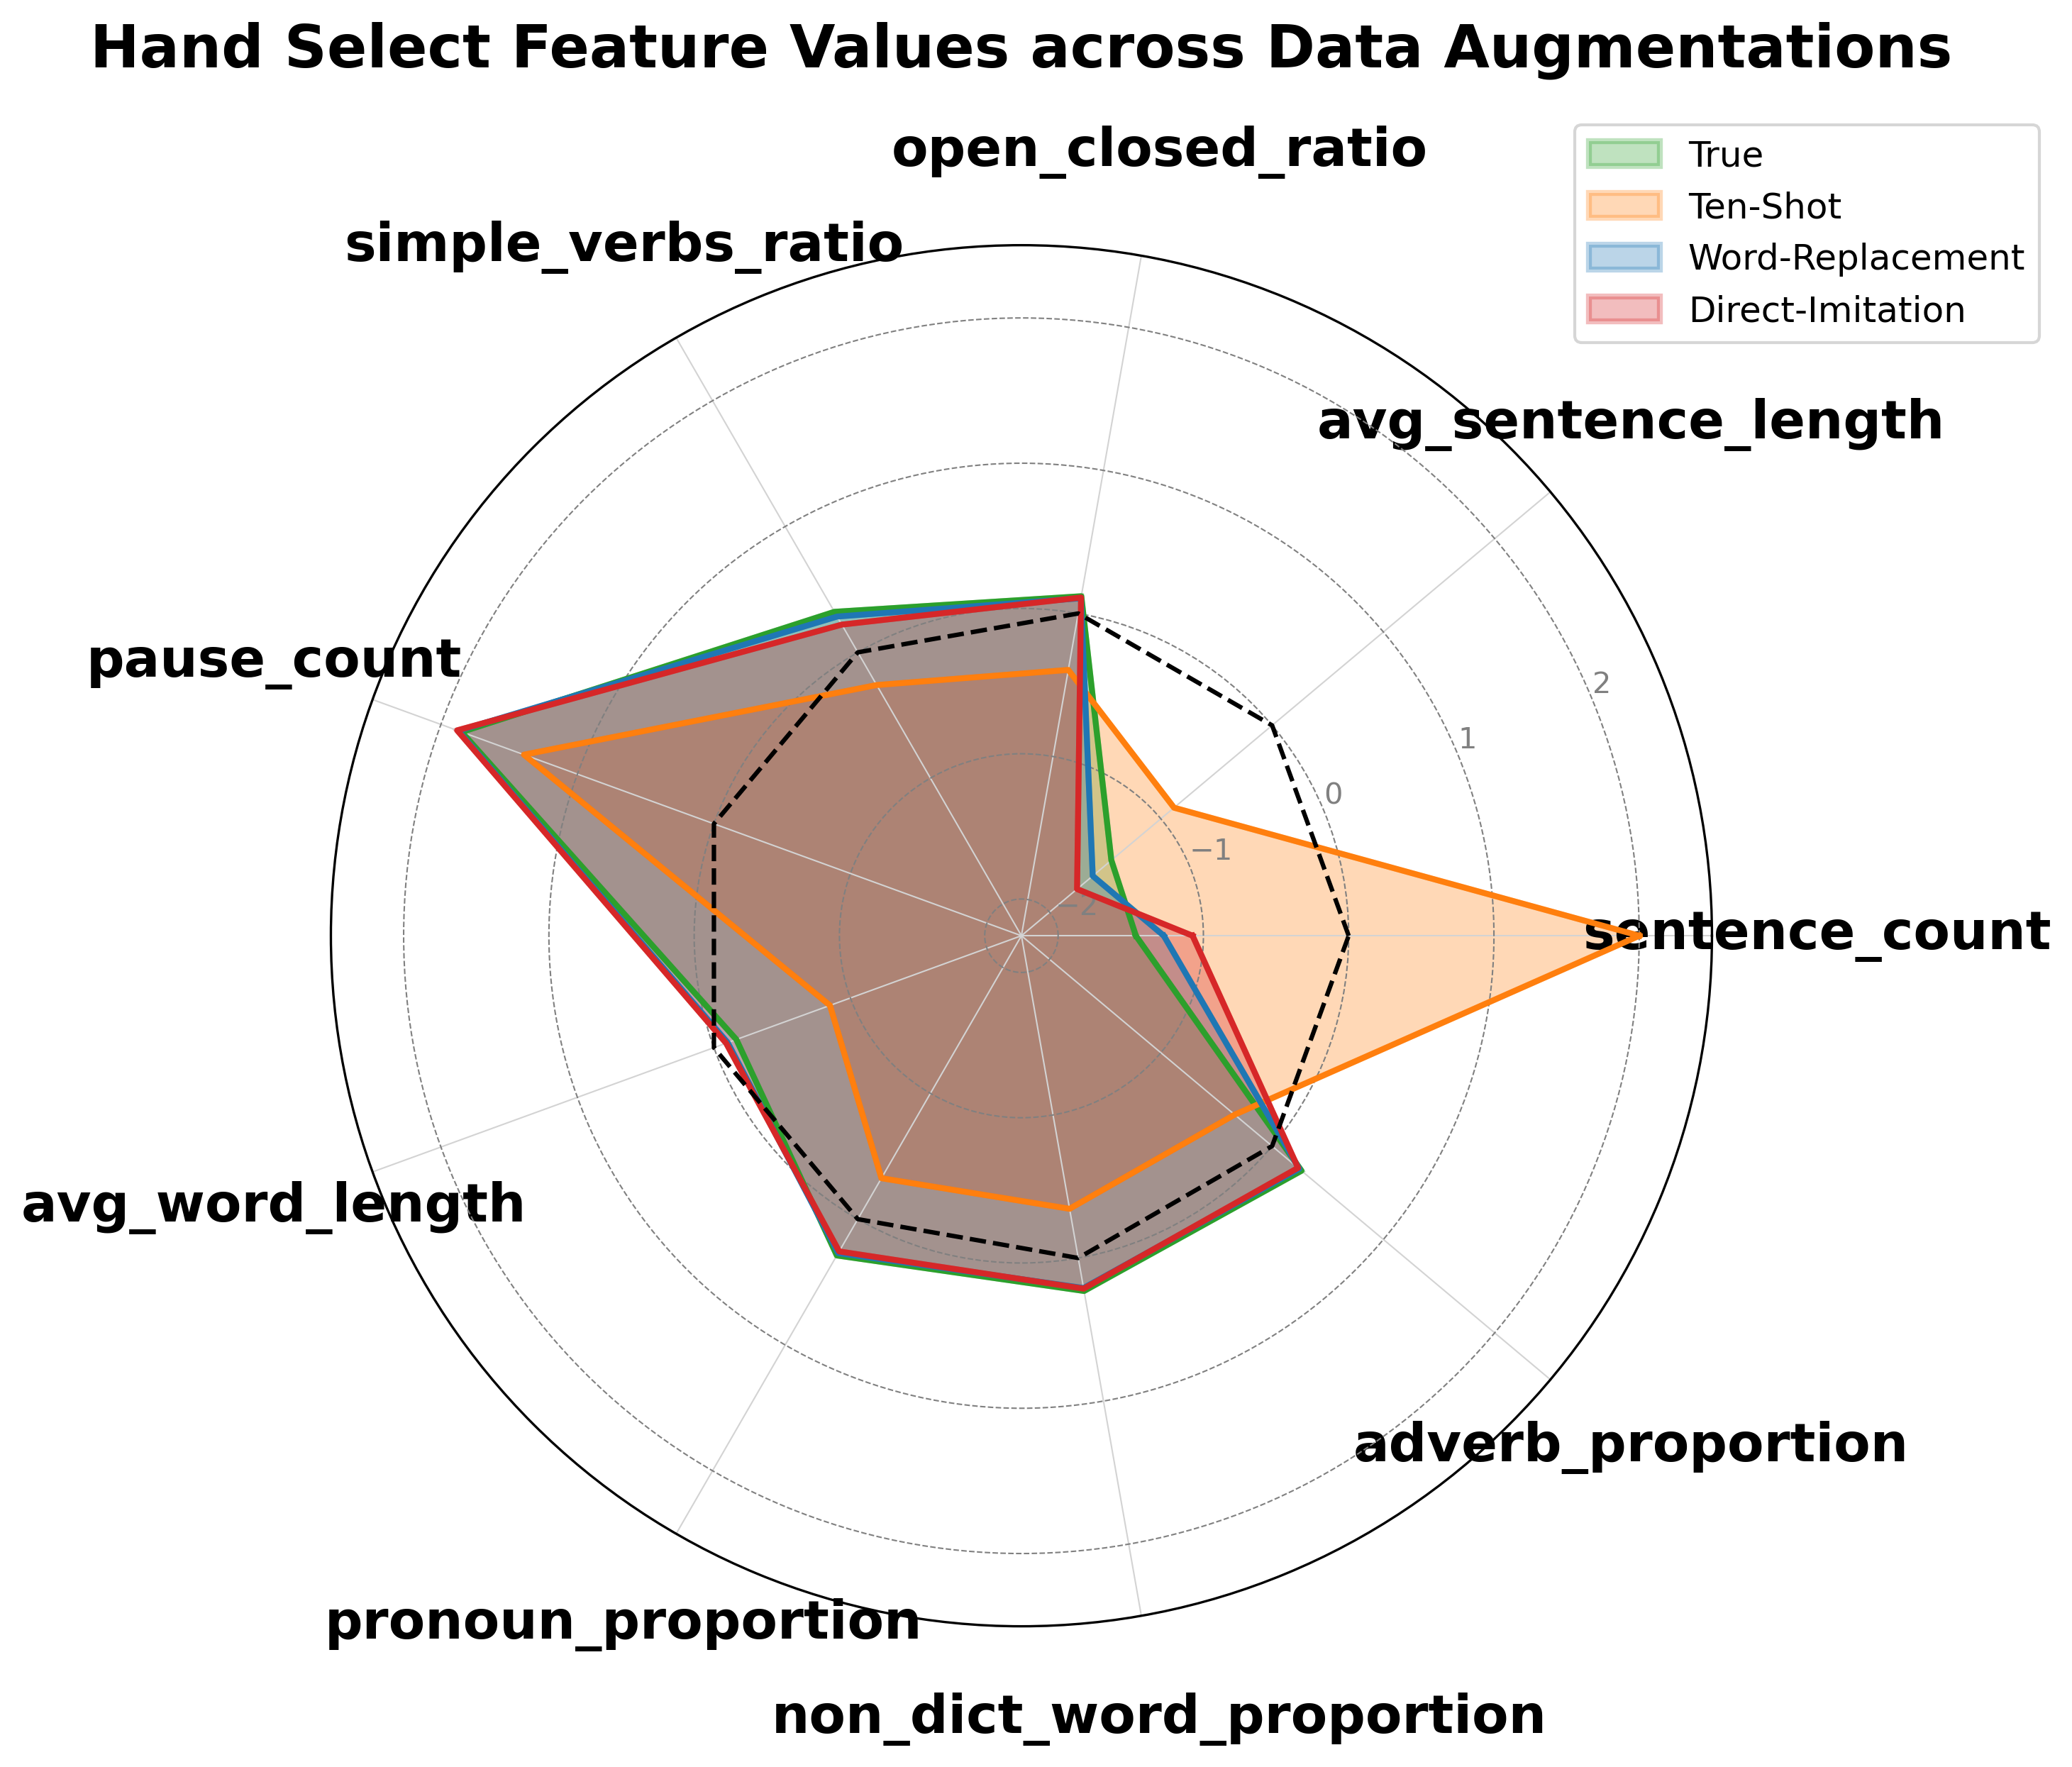

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Standardize the DataFrame (z-score normalization)
df_standardized = (df - df.mean()) / df.std()

# Prepare data for radar chart
categories = df_standardized.index.tolist()

# Append the first metric to close the loop
values_true = np.append(df_standardized['true'].values, df_standardized['true'].values[0])
values_v1 = np.append(df_standardized['v1'].values, df_standardized['v1'].values[0])
values_v3 = np.append(df_standardized['v3'].values, df_standardized['v3'].values[0])
values_v4 = np.append(df_standardized['v4'].values, df_standardized['v4'].values[0])

# Add the first category to close the chart
categories += [categories[0]]

# Define angles for radar chart
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=True)

# Create figure and polar axis
fig, ax = plt.subplots(figsize=(10, 10), dpi=300, subplot_kw=dict(polar=True))

# Plot data for each version with enhanced aesthetics
ax.fill(angles, values_true, alpha=0.3, label='True', color='tab:green', edgecolor='tab:green', linewidth=2)
ax.plot(angles, values_true, color='tab:green', linewidth=2)

ax.fill(angles, values_v1, alpha=0.3, label='Ten-Shot', color='tab:orange', edgecolor='tab:orange', linewidth=2)
ax.plot(angles, values_v1, color='tab:orange', linewidth=2)

ax.fill(angles, values_v4, alpha=0.3, label='Word-Replacement', color='tab:blue', edgecolor='tab:blue', linewidth=2)
ax.plot(angles, values_v4, color='tab:blue', linewidth=2)

ax.fill(angles, values_v3, alpha=0.3, label='Direct-Imitation', color='tab:red', edgecolor='tab:red', linewidth=2)
ax.plot(angles, values_v3, color='tab:red', linewidth=2)

# Add a reference line at 0
ax.plot(angles, [0] * len(angles), color='black', linestyle='--', linewidth=1.5)

# Customize gridlines and ticks
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories[:-1], fontsize=18, fontweight='bold', color='black')
ax.tick_params(axis='x', pad=25)  # Increase the spacing of the labels
ax.tick_params(axis='y', labelsize=10, colors='gray')

# Add radial gridlines
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.xaxis.grid(True, linestyle='-', linewidth=0.5, color='lightgray')

# Adjust radial limits and label visibility
ax.set_ylim(df_standardized.min().min() - 0.5, df_standardized.max().max() + 0.5)

# Set title and legend with enhanced fonts
plt.title("Hand Select Feature Values across Data Augmentations", fontsize=20, fontweight='bold', pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1), fontsize=12)

# Save the figure with a transparent background
plt.savefig("../plots/radar_chart_larger_font.png", transparent=True, dpi=1080, bbox_inches='tight')

# Show the figure
plt.tight_layout()
plt.show()

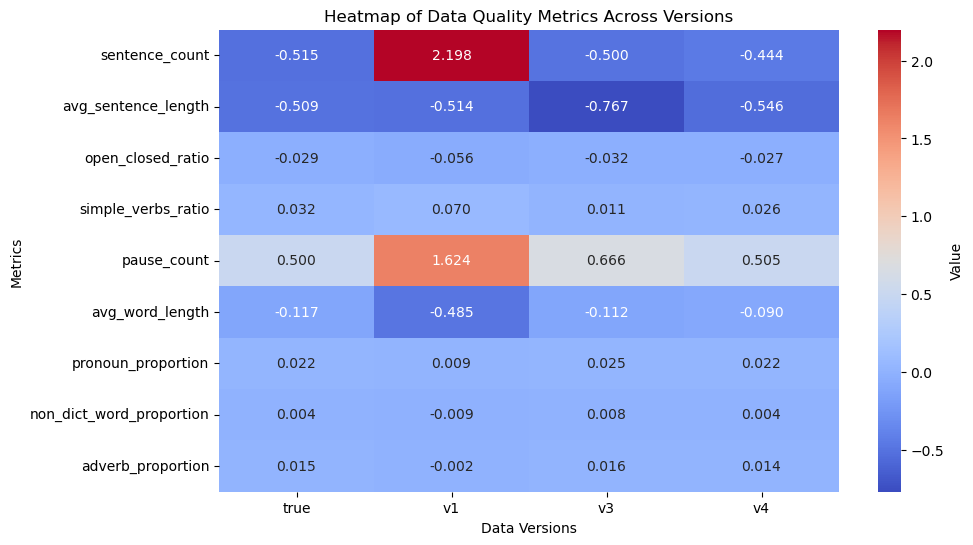

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".3f", cbar_kws={'label': 'Value'})

# Add title and labels
plt.title("Heatmap of Data Quality Metrics Across Versions")
plt.ylabel("Metrics")
plt.xlabel("Data Versions")
plt.show()